# Spectrum Analysis

In [1]:
import numpy as np

#from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

Definizione dei parametri del segnale:
- **N** : numero campioni
- **fs**: frequenza di campionamento [Hz]

In [2]:
N = 6000
fs = 200

- **dt** : intervallo di campionamento
- **T0** : periodo di osservazione

In [3]:
dt = 1/fs
T0 = (N-1)*dt

- **t**: istanti di campionamento

In [4]:
t = np.arange(0,T0,dt)
t = np.linspace(0,T0,num=N,endpoint=True)

## Definizione del segnale

- *noise* : rumore gaussiano a media 0 e $\sigma=3$
- *pure* : segnale originale
    1. frequenza costante
    2. frequenza oscillante
    3. frequenza progressivamente crescente

In [5]:
σ = 3.
f0 = 10.
ω1 = 0.1
Δf = 0.05

In [6]:
noise = np.random.normal(0,σ,len(t))
pure1 = np.sin(2*np.pi*f0*t)
pure2 = np.sin(2*np.pi*(f0+0.3*np.sin(ω1*t))*t)
pure3 = np.sin(2*np.pi*(f0+Δf*t)*t)

In [7]:
signal1 = pure1 + noise
signal2 = pure2 + noise
signal3 = pure3 + noise

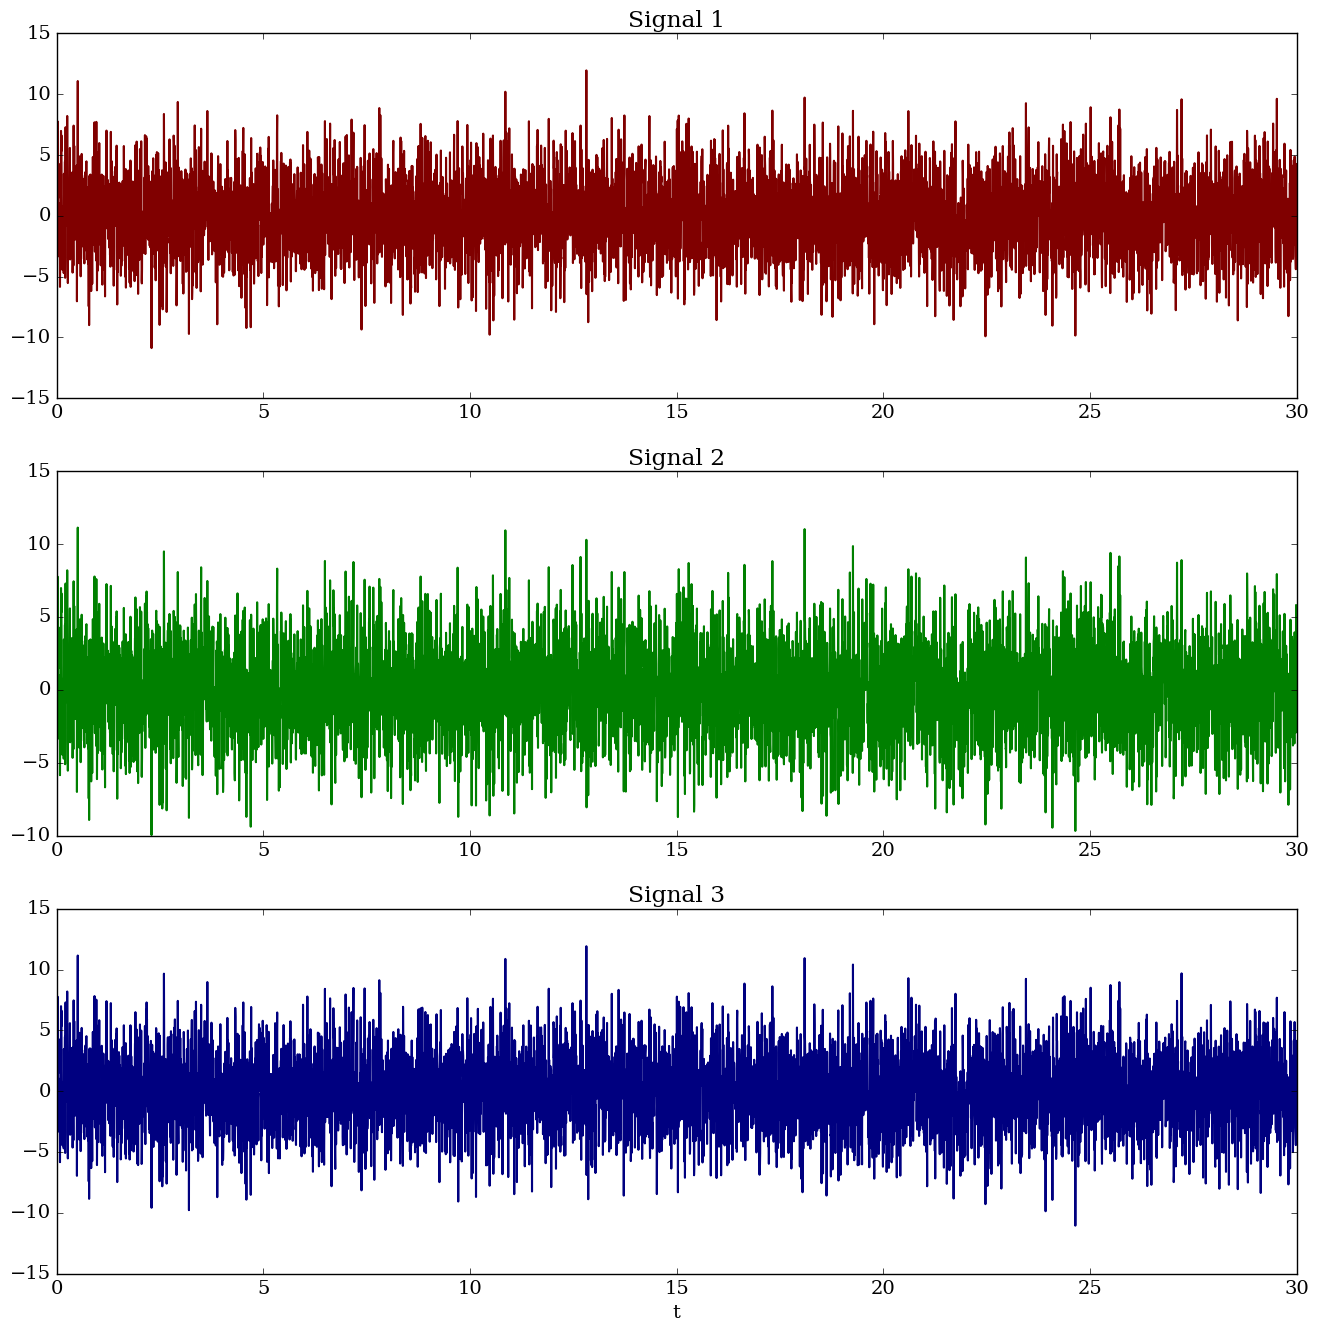

In [8]:
plt.figure(figsize=(16,16), dpi=300)
plt.subplot(311)
plt.plot(t,signal1,lw=1.5,color=(0.5,0.,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 1')
plt.subplot(312)
plt.plot(t,signal2,lw=1.5,color=(0.0,0.5,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 2')
plt.subplot(313)
plt.plot(t,signal3,lw=1.5,color=(0.,0.,0.5))
plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 3');


# FFT

Calcola **FFT** e range di frequenze

In [9]:
F1 = np.fft.fft(signal1)
F2 = np.fft.fft(signal2)
F3 = np.fft.fft(signal3)
freq = np.linspace(0,1/(2*dt),N//2)

Calcola **PSD**

In [10]:
psd1 = 2.0/N * np.abs(F1[0:N//2])**2
psd2 = 2.0/N * np.abs(F2[0:N//2])**2
psd3 = 2.0/N * np.abs(F3[0:N//2])**2

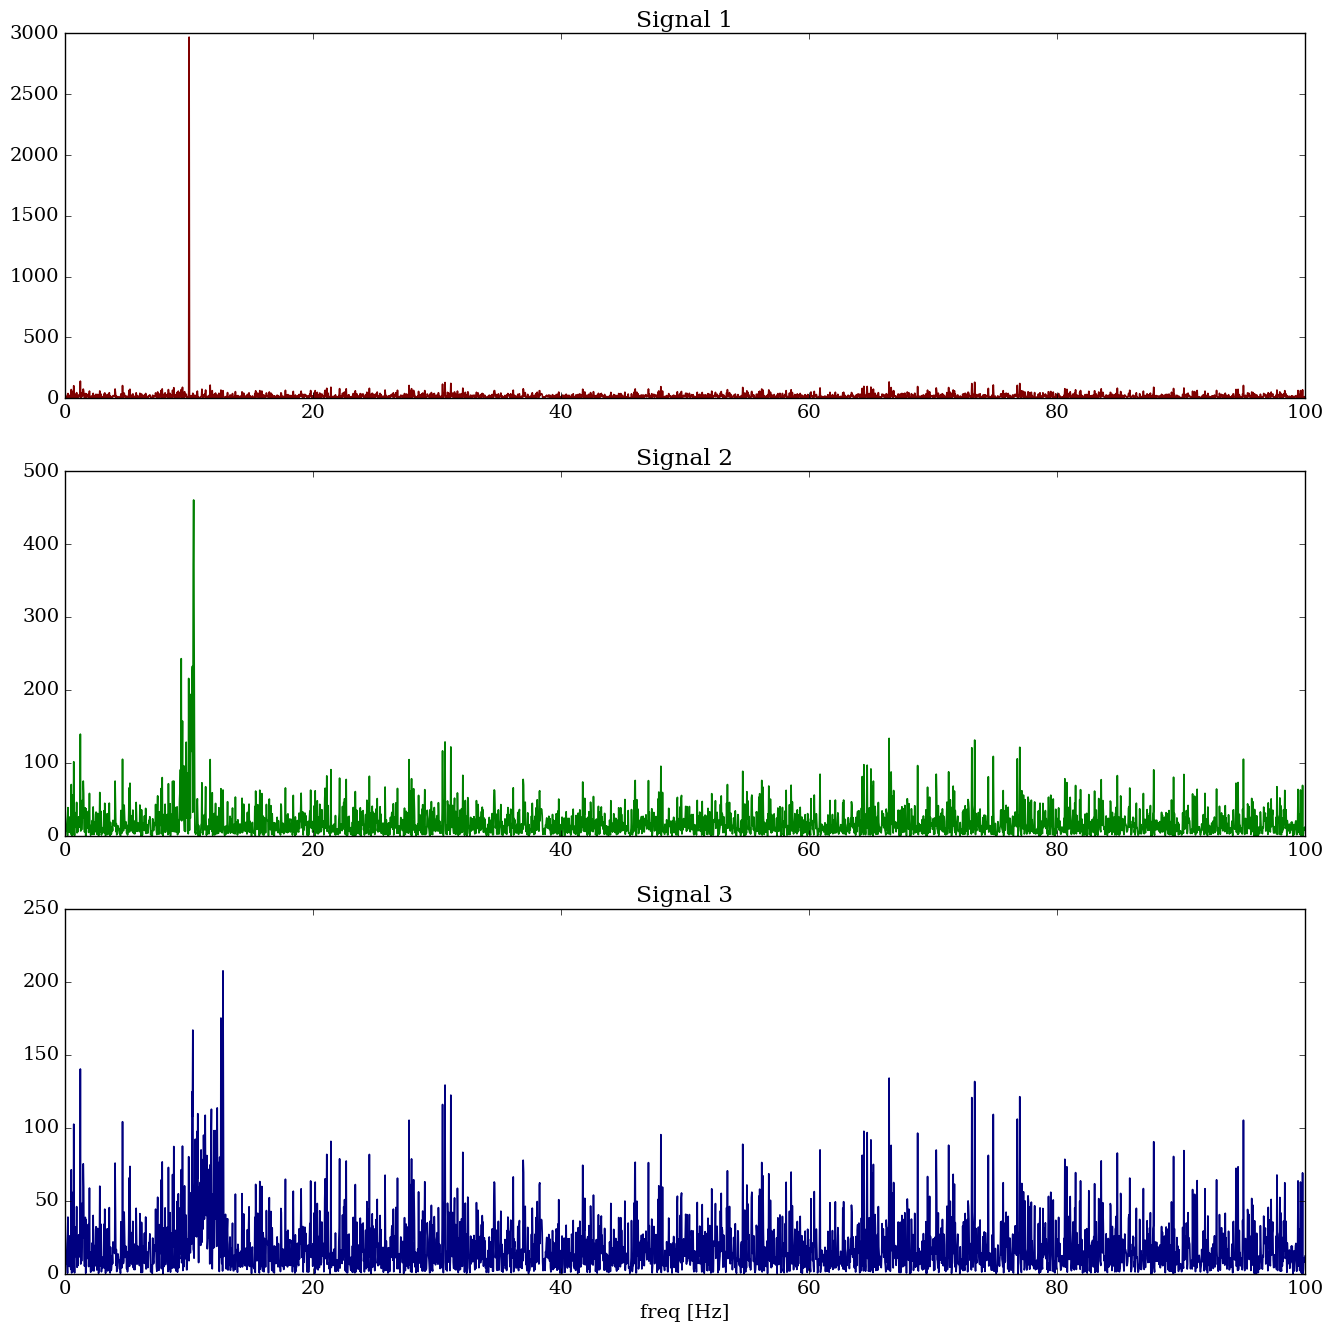

In [11]:
plt.figure(figsize=(16,16), dpi=300)
plt.subplot(311)
plt.plot(freq,psd1,lw=1.2,color=(0.5,0.,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 1')
plt.subplot(312)
plt.plot(freq,psd2,lw=1.2,color=(0.,0.5,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 2')
plt.subplot(313)
plt.plot(freq,psd3,lw=1.2,color=(0.,0.,0.5))
plt.xlabel('freq [Hz]')
#plt.ylabel('signal')
plt.title('Signal 3');

Finestra di **Hanning**

In [12]:
F1w = np.fft.fft(signal1*np.hanning(N))
F2w = np.fft.fft(signal2*np.hanning(N))
F3w = np.fft.fft(signal3*np.hanning(N))

In [13]:
psd1w = 2.0/N * np.abs(F1w[0:N//2])**2
psd2w = 2.0/N * np.abs(F2w[0:N//2])**2
psd3w = 2.0/N * np.abs(F3w[0:N//2])**2

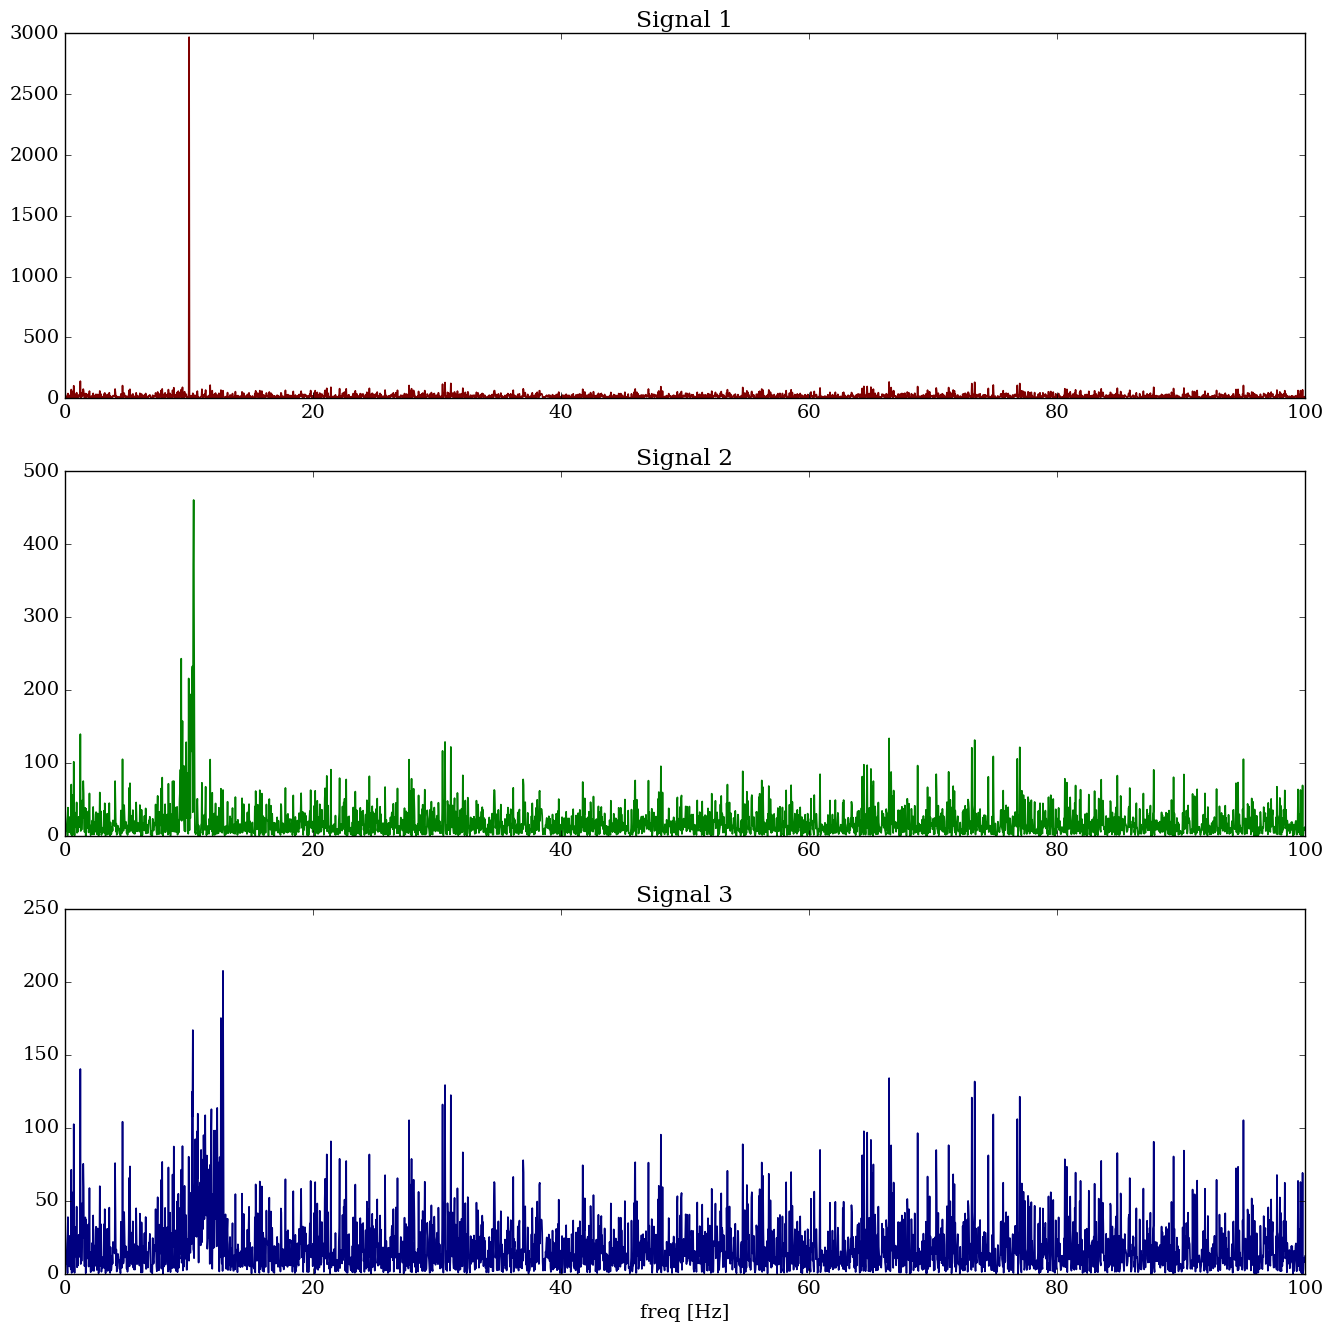

In [14]:
plt.figure(figsize=(16,16), dpi=300)
plt.subplot(311)
plt.plot(freq,psd1,lw=1.2,color=(0.5,0.,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 1')
plt.subplot(312)
plt.plot(freq,psd2,lw=1.2,color=(0.,0.5,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 2')
plt.subplot(313)
plt.plot(freq,psd3,lw=1.2,color=(0.,0.,0.5))
plt.xlabel('freq [Hz]')
#plt.ylabel('signal')
plt.title('Signal 3');

In [15]:
ind = np.argmax(freq>=20.)

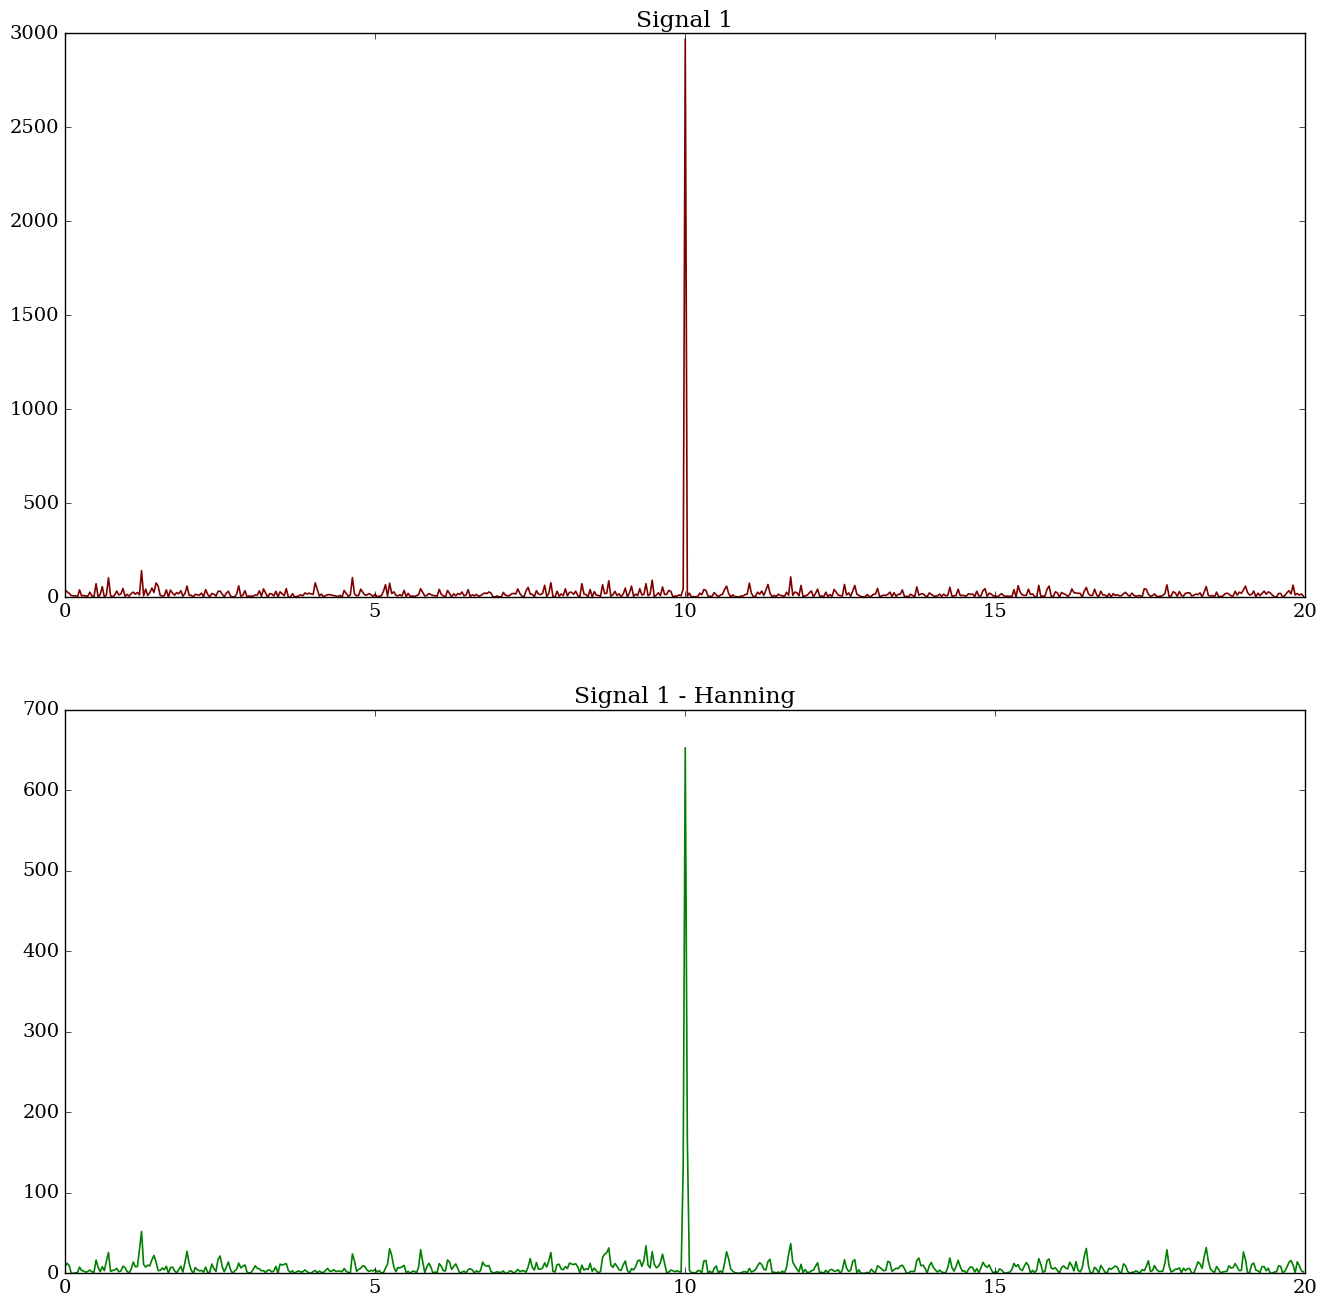

In [16]:
plt.figure(figsize=(16,16), dpi=300)
plt.subplot(211)
plt.plot(freq[:ind],psd1[:ind],lw=1.2,color=(0.5,0.,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 1');
plt.subplot(212)
plt.plot(freq[:ind],psd1w[:ind],lw=1.2,color=(0.,0.5,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 1 - Hanning');

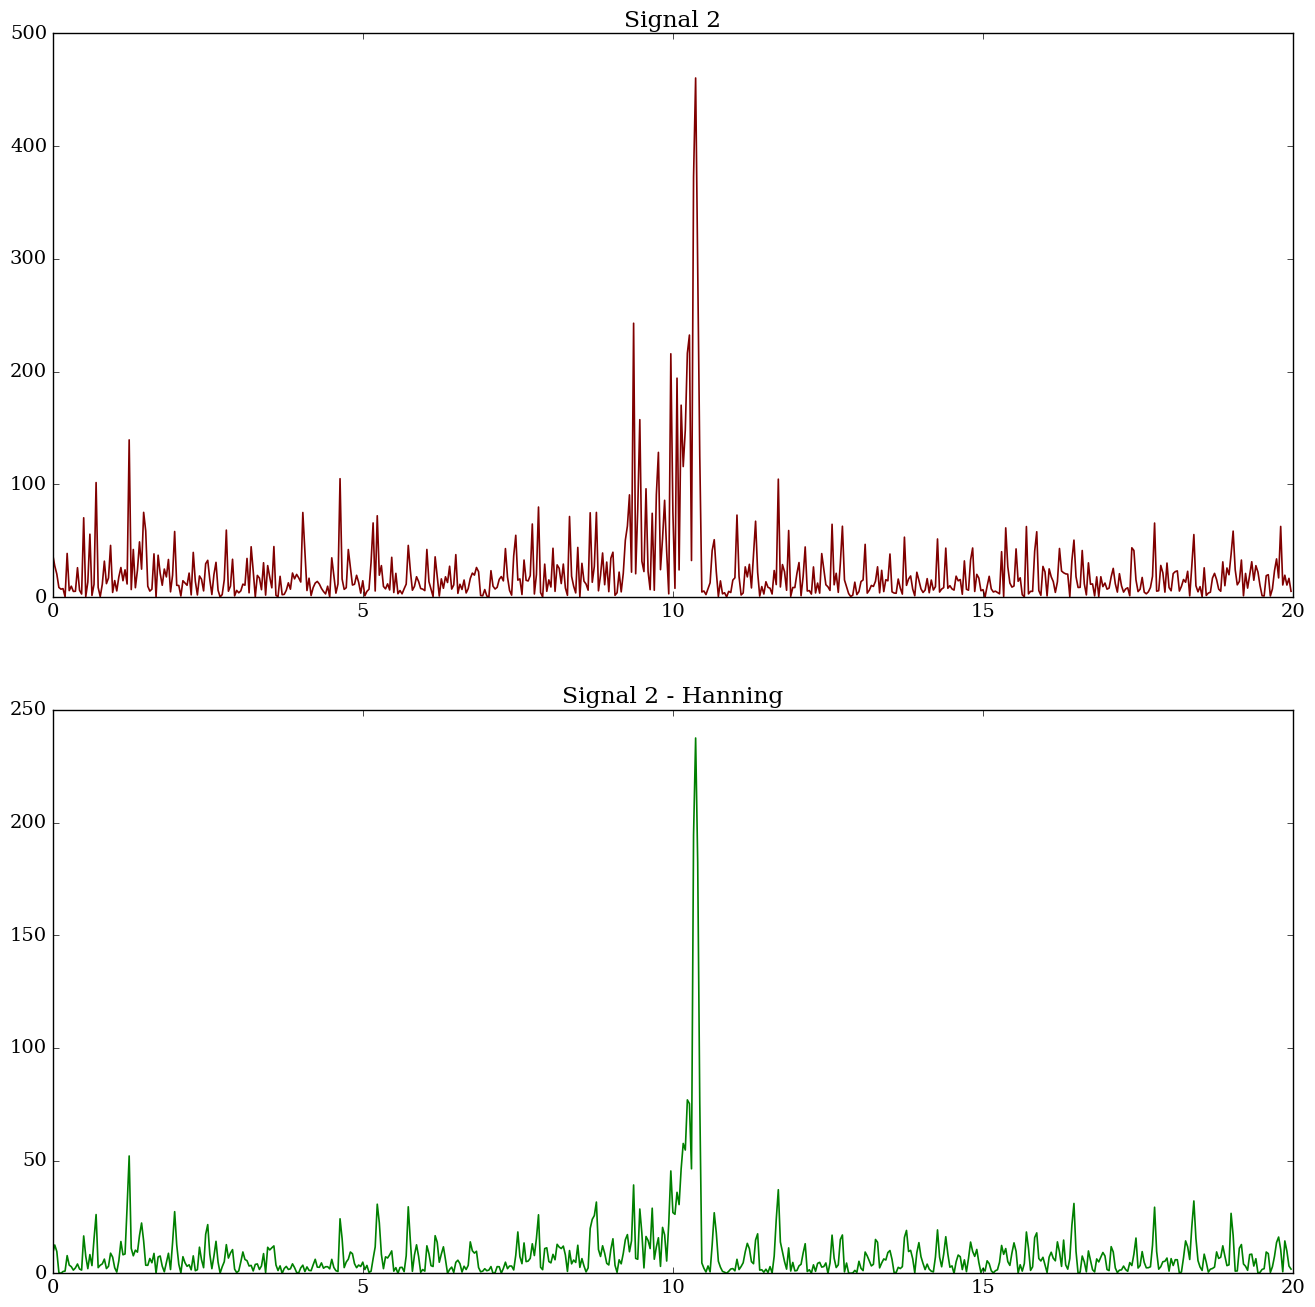

In [17]:
plt.figure(figsize=(16,16), dpi=300)
plt.subplot(211)
plt.plot(freq[:ind],psd2[:ind],lw=1.2,color=(0.5,0.,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 2')
plt.subplot(212)
plt.plot(freq[:ind],psd2w[:ind],lw=1.2,color=(0.,0.5,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 2 - Hanning');

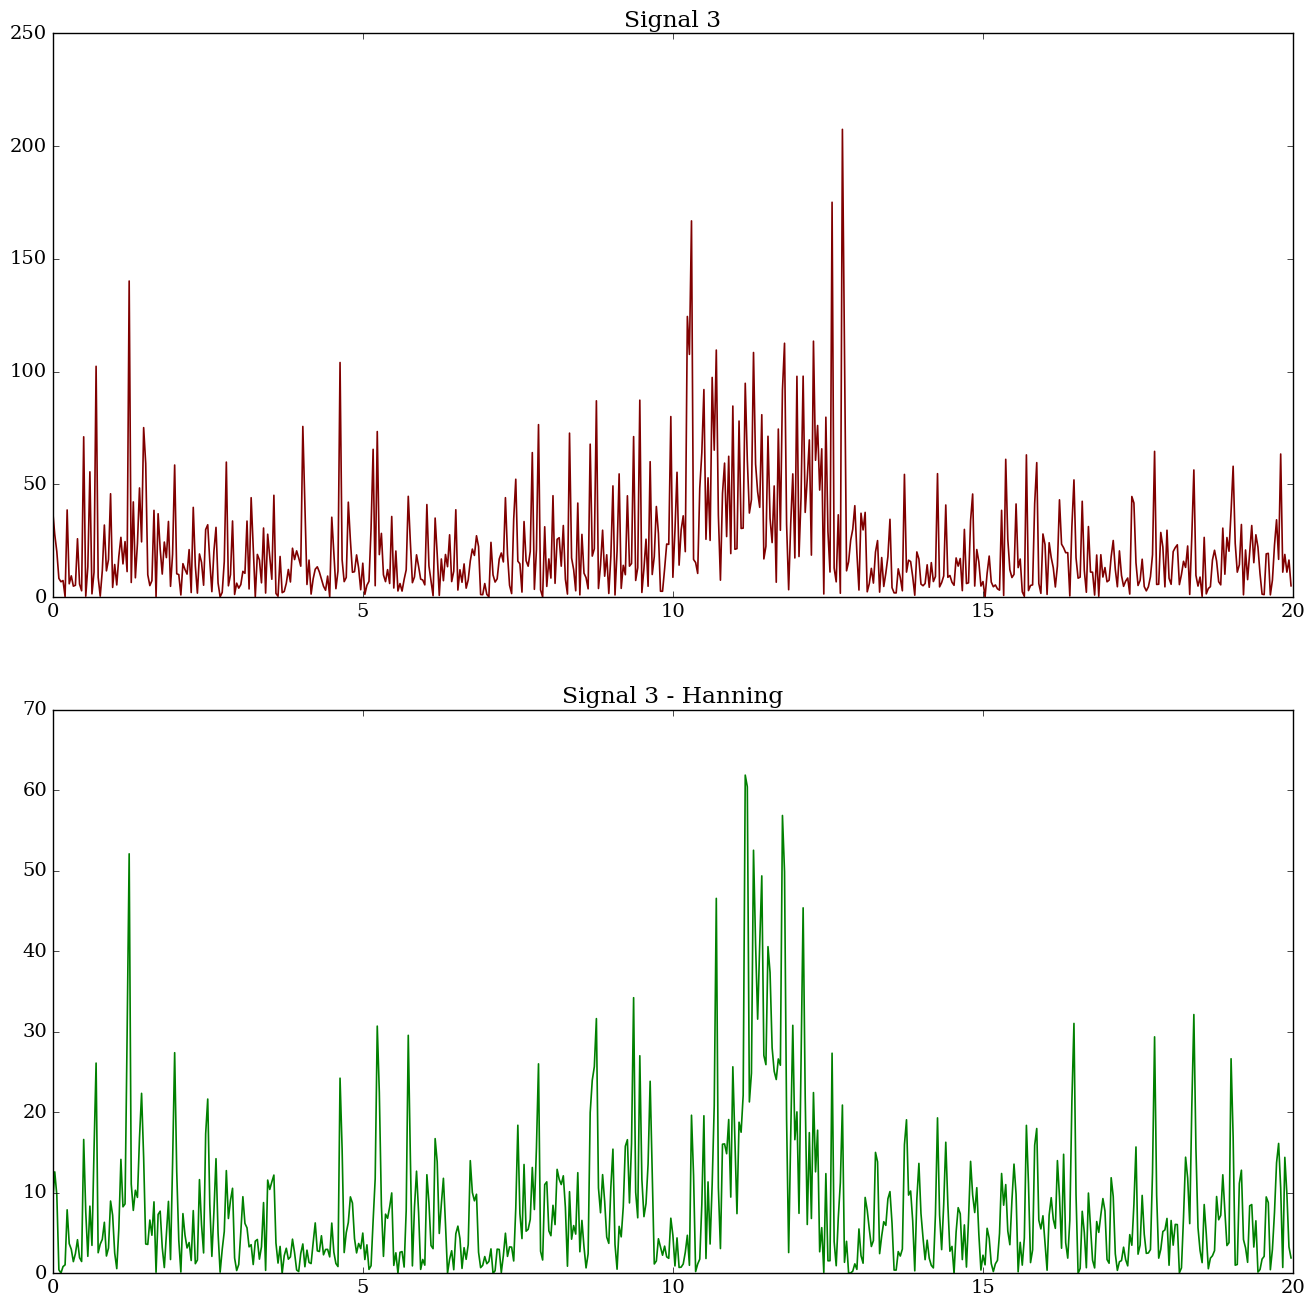

In [18]:
plt.figure(figsize=(16,16), dpi=300)
plt.subplot(211)
plt.plot(freq[:ind],psd3[:ind],lw=1.2,color=(0.5,0.,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 3')
plt.subplot(212)
plt.plot(freq[:ind],psd3w[:ind],lw=1.2,color=(0.,0.5,0.))
#plt.xlabel('t')
#plt.ylabel('signal')
plt.title('Signal 3 - Hanning');